In [2]:
# pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
import pydot
import requests
import graphviz
import numpy as np
import pandas as pd
import sklearn as sk
from pprint import pprint
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay


In [2]:
# read csv
data = pd.read_csv('DataTableToRegress-Forest.csv')
featnames = ['Al', 'Cu', 'Fe', 'Mn', 'Ni', 'Ti', 'V', 'Cr', 'Mo', 'Nb']
# data.describe

In [3]:
# train_test_split
# X = pd.DataFrame(data[features], columns=features)  # Features
X = data[featnames]  # Features

# y = data['Tot Vol Frac Other']
y = data['Acceptable']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
## initialize model
rf_clf = RandomForestRegressor(n_estimators=1000, max_depth=10, random_state=42) #random_state=42
rf_clf.fit(X_train,y_train)


RandomForestRegressor(max_depth=10, n_estimators=1000, random_state=42)

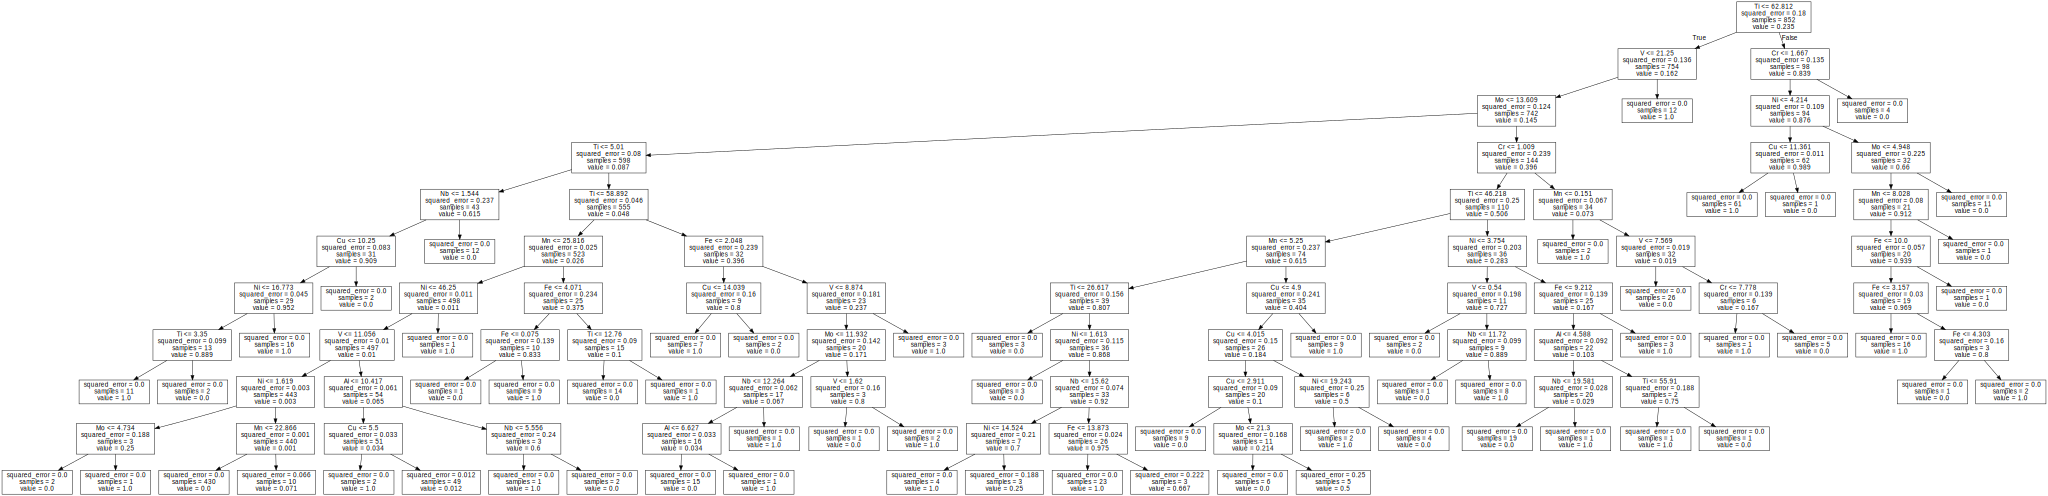

In [27]:
# Plot a decision tree
index = 5
tree = rf_clf.estimators_[index]
from IPython.display import display
columns = list(X_train.columns)
display(graphviz.Source(export_graphviz(tree, feature_names=featnames, class_names=True, out_file=None)))

# Save image to png file
export_graphviz(tree, out_file = 'tree.dot', feature_names = featnames, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

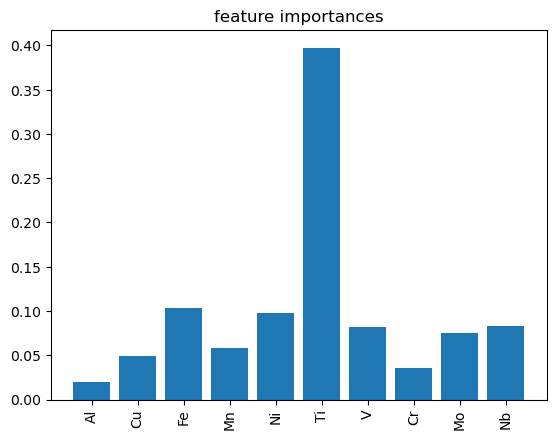

In [28]:
# Plot importances
importances = list(rf_clf.feature_importances_)
labeled_importances = [(feature, round(importance, 2)) for feature, importance in zip(X, importances)]
indices = range(len(importances))
plt.bar(indices, importances, orientation = 'vertical')
plt.title('feature importances')
plt.xticks(indices, X, rotation='vertical')
plt.show()

In [29]:
#predictions 
# help(r2_score)

y_hat = rf_clf.predict(X_test)

r2 = r2_score(y_test, y_hat)

print(f'R2 Score: {r2}')

ev = explained_variance_score(y_test, y_hat)
print(f'EV Score: {ev}')

R2 Score: 0.7359654696630303
EV Score: 0.73628748443304


In [30]:
assert r2 > 0.7
assert ev > 0.7

In [31]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_hat)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_hat)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 0.09179396151662518
Mean Squared Error (MSE): 0.04880111754477995
Root Mean Squared Error (RMSE): 0.22090974977302372


Certainly! When evaluating regression models, such as the one you've trained, lower values for error metrics are generally considered better, indicating a closer fit of the predicted values to the true values. Let's discuss each of these error metrics and how to interpret them:

1. **Mean Absolute Error (MAE):**
   - MAE represents the average absolute differences between the predicted values and the true values. 
   - Interpretation: An MAE of 0.0917 means, on average, your predictions are off by approximately 0.0917 units from the true values. Lower MAE indicates better accuracy.

2. **Mean Squared Error (MSE):**
   - MSE measures the average of the squared differences between predicted and true values.
   - Interpretation: An MSE of 0.0488 means, on average, the squared differences between your predictions and true values amount to 0.0488. Lower MSE indicates better accuracy.

3. **Root Mean Squared Error (RMSE):**
   - RMSE is the square root of MSE and is expressed in the same units as the target variable.
   - Interpretation: An RMSE of 0.2209 means, on average, your predictions are off by approximately 0.2209 units from the true values in the original unit of the target variable. Lower RMSE indicates better accuracy.

In summary, lower values for MAE, MSE, and RMSE are desirable as they indicate a smaller average difference between predicted and true values. This suggests that your model is performing well in terms of accuracy and precision. Always aim for the lowest possible values for these error metrics.

In [40]:
# for i, feature in enumerate(features):
#     features = [i]
#     fig, ax = plt.subplots()
#     plot_partial_dependence(rf_clf, X, features, ax=ax)
#     plt.suptitle(f'Partial Dependence Plot for {feature}')
#     plt.subplots_adjust(top=0.9)  # Adjust plot title location
#     plt.show()

Yes, that's correct. Random Forest models can provide insights into feature interactions, although the interpretation might not be as straightforward as it is for linear models.

In a Random Forest model, each decision tree is constructed using a subset of the features, and the final prediction is a result of the combined predictions from all the trees. As a result, the model can capture complex interactions between features, including nonlinear and higher-order interactions.

To understand feature interactions in a Random Forest model:

1. **Feature Importance:**
   - Random Forest models often have a built-in feature importance metric, which can tell you the contribution of each feature in making predictions. A higher feature importance suggests a more significant impact on the model's predictions.

2. **Partial Dependence Plots (PDPs):**
   - PDPs show the relationship between a feature and the predicted outcome while keeping other features constant. By analyzing PDPs, you can gain insights into how changing one feature affects the prediction while holding other features fixed.

3. **Permutation Importance:**
   - This technique involves permuting the values of a feature and measuring the change in model performance (e.g., accuracy, R-squared). A significant drop in performance indicates that the feature is important.

4. **Interaction Plots:**
   - These plots can help visualize interactions between two features. They show how the predicted outcome changes as you vary two features simultaneously while keeping others constant.

5. **Tree Visualization:**
   - You can visualize individual decision trees within the Random Forest to understand how splits are made based on various features and how they contribute to predictions.

Understanding feature interactions in a Random Forest model is crucial for comprehending how the model processes and combines features to make predictions. It helps in model interpretation, identifying important features, and gaining insights into the underlying patterns and relationships in the data.

In [41]:
# disp1 = PartialDependenceDisplay.from_estimator(rf_clf.fit(X_train,y_train), X_train, [1, 2])

In [42]:
# disp1 = PartialDependenceDisplay.from_estimator(rf_clf, X_train, features=[1,2])

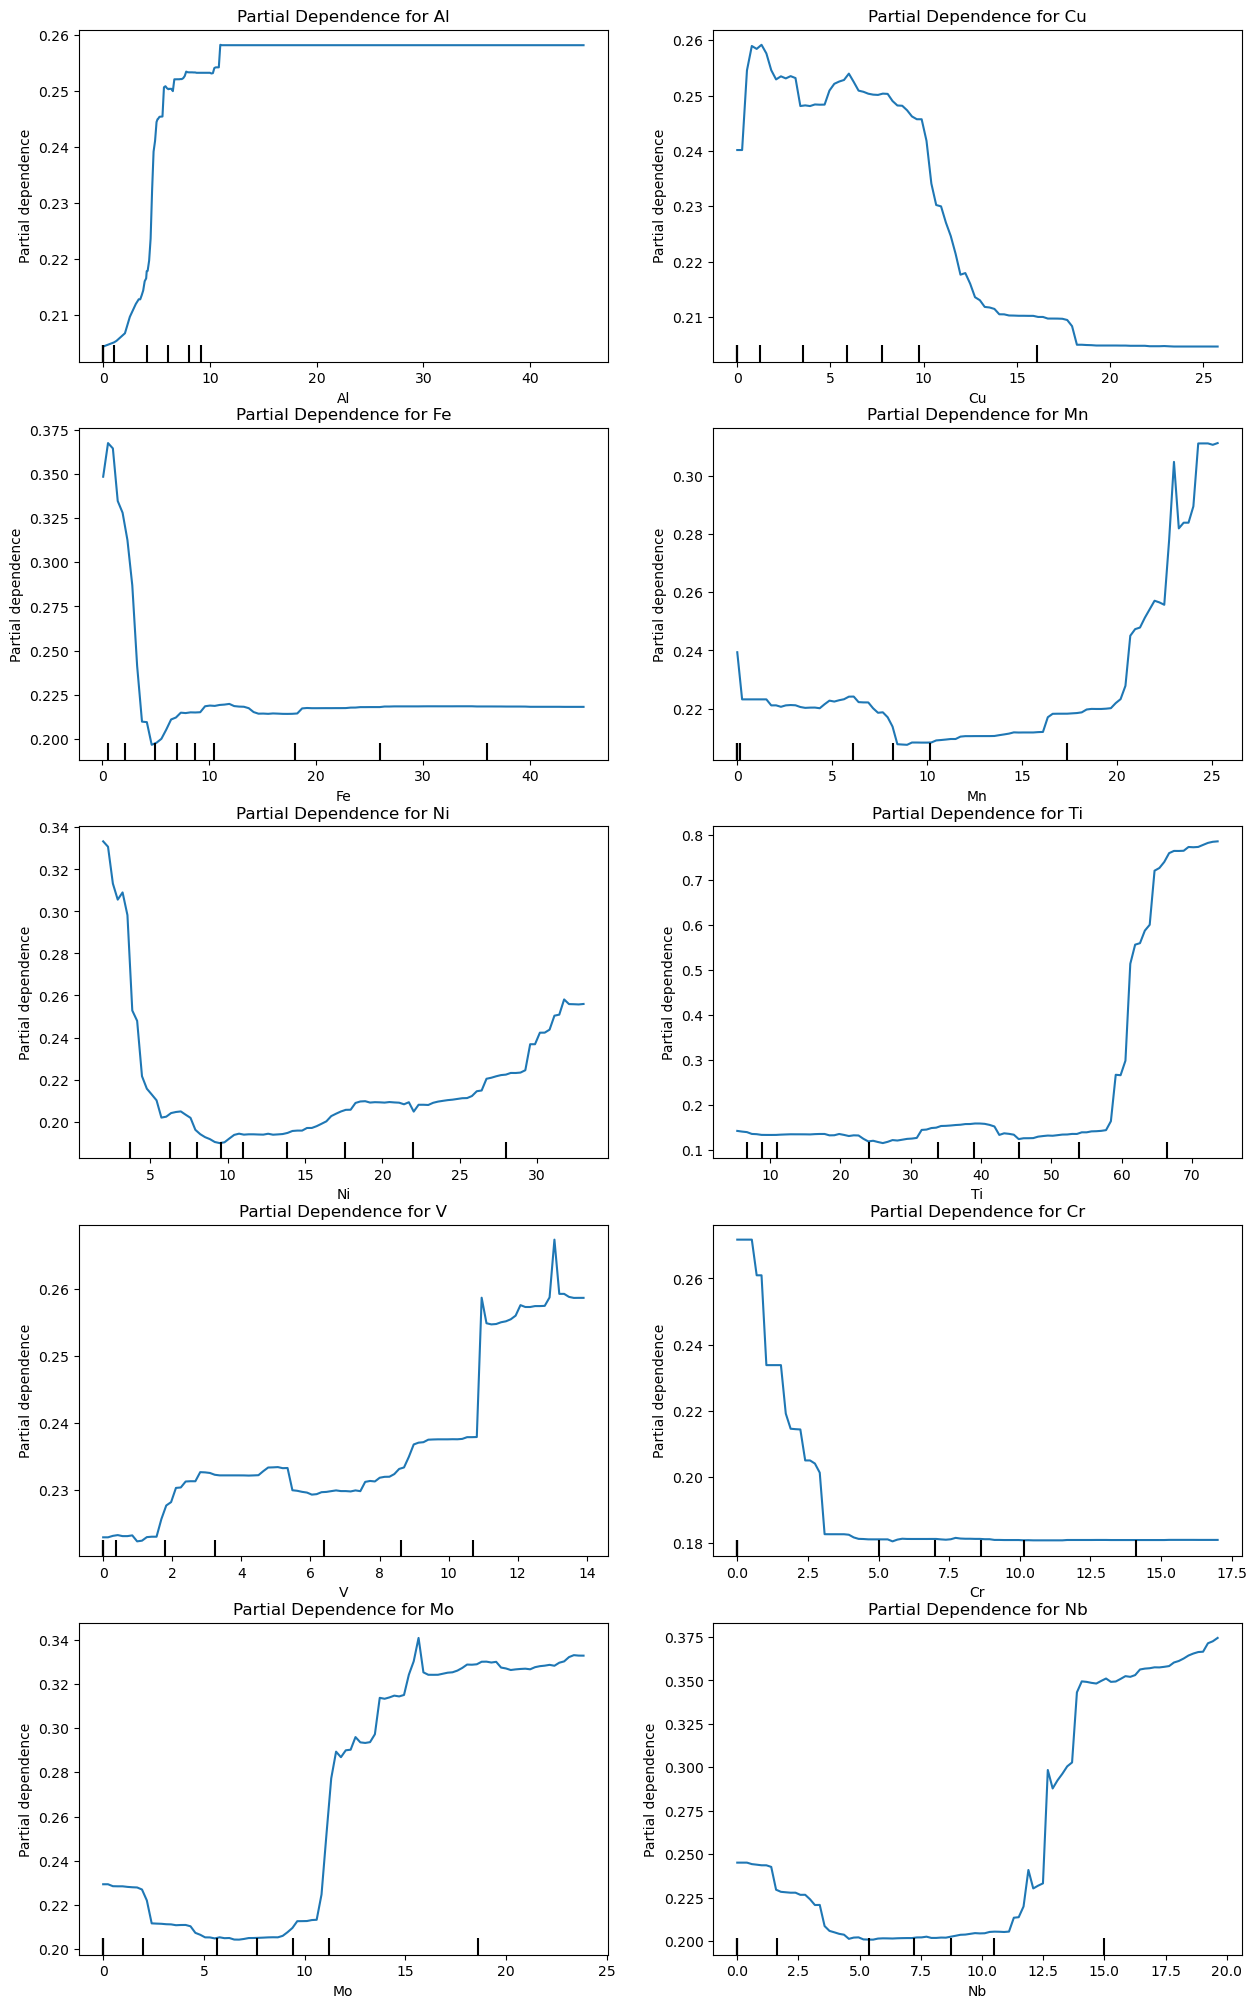

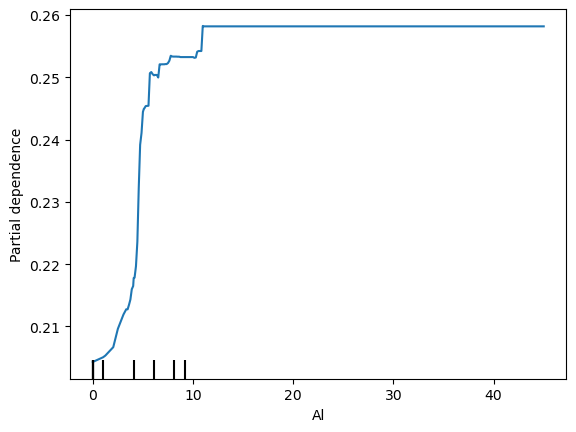

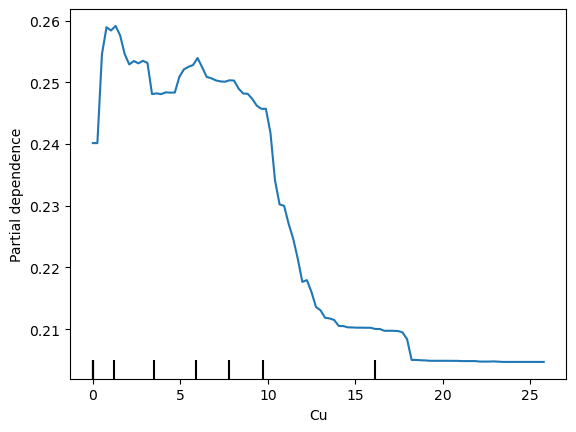

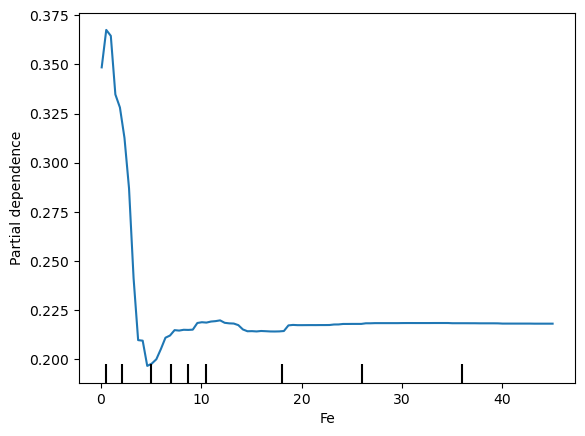

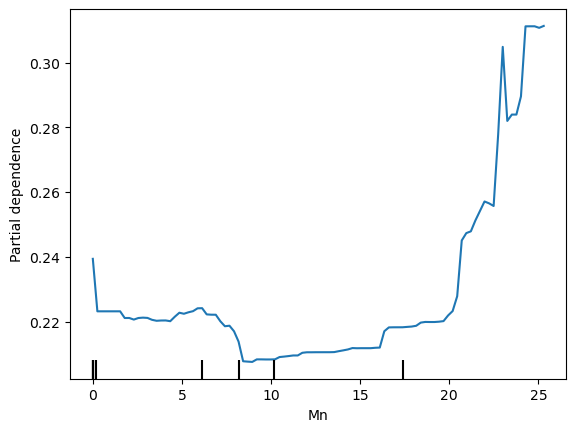

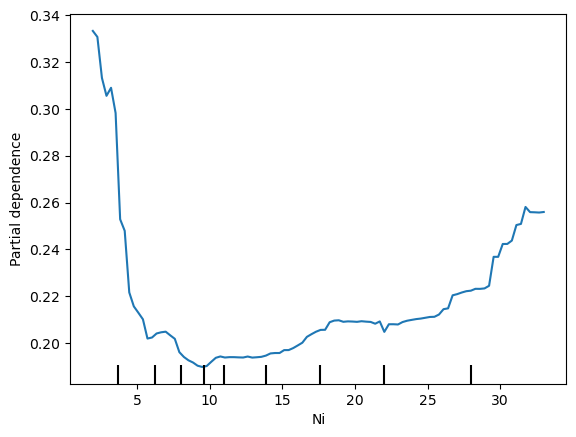

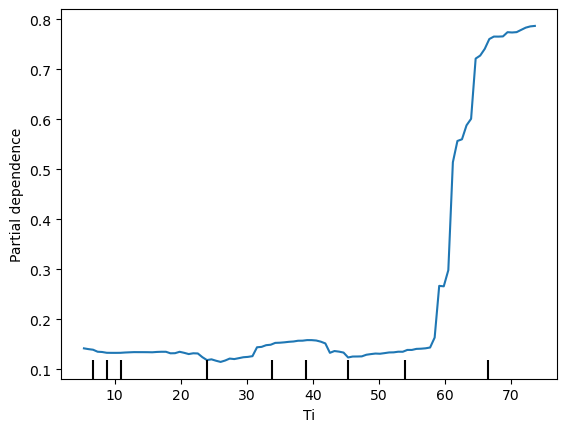

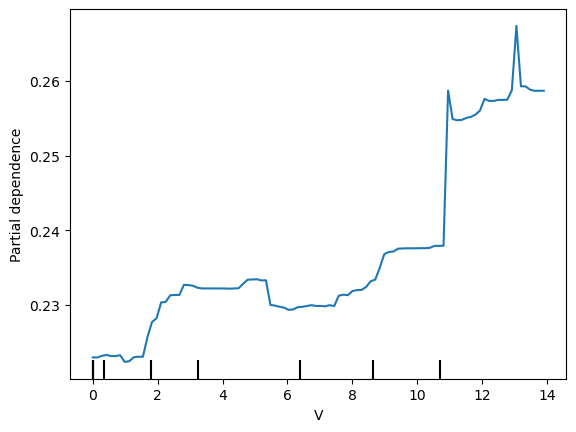

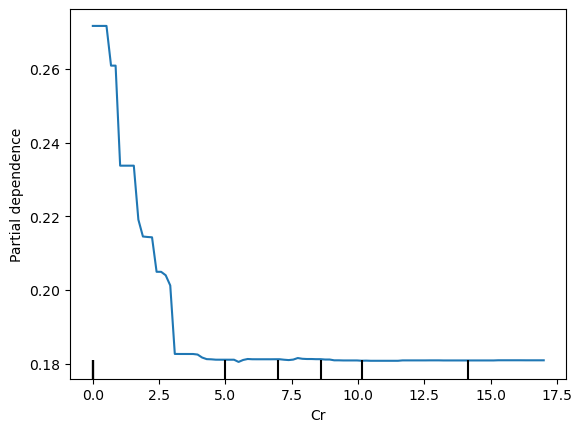

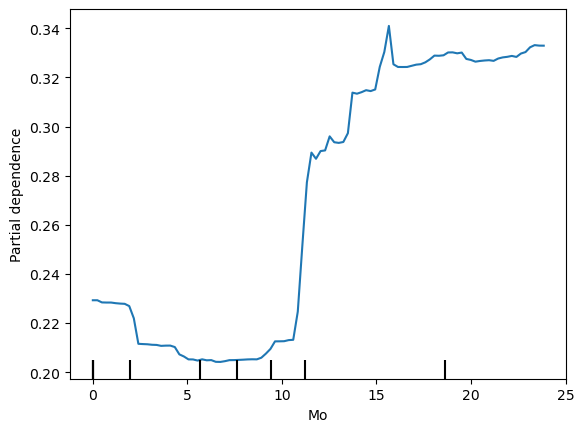

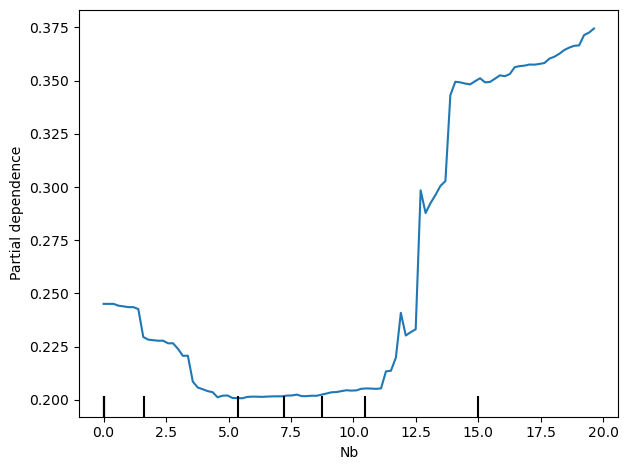

In [56]:
from math import ceil

# Get the number of features
num_features = X_train.shape[1]

# Calculate the number of rows needed for a 2-column layout
num_rows = ceil(num_features / 2)

# Create a figure with subplots
fig, axs = plt.subplots(num_rows, 2, figsize=(15, 5 * num_rows))

# Flatten the axes array in case we have only one row
axs = axs.flatten()

# Loop through each feature and plot its partial dependence
for i in range(num_features):
    row = i // 2
    col = i % 2
    feature_to_display = [(i,)]
    disp = PartialDependenceDisplay.from_estimator(rf_clf, X_train, features=feature_to_display)
    disp.plot(ax=axs[i])
    axs[i].set_title(f'Partial Dependence for {featnames[i]}')
    axs[i].set_xlabel(f'{featnames[i]}')
    axs[i].set_ylabel('Partial Dependence')

# Hide any empty subplots
for i in range(num_features, num_rows * 2):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()


Certainly! Partial Dependence Plots (PDPs) are powerful tools for understanding the relationship between a feature and the predicted outcome of a machine learning model while keeping other features constant. Here's a detailed explanation of how to interpret Partial Dependence Plots:

1. **Definition**: A Partial Dependence Plot (PDP) shows the relationship between a feature and the predicted outcome, while keeping other features at a constant or average value.

2. **Y-Axis**: The y-axis represents the predicted outcome or response variable. This can be the predicted probability for classification tasks or the predicted value for regression tasks.

3. **X-Axis**: The x-axis represents the values of the feature for which we want to observe the effect.

4. **Shape of the Plot**: The shape of the PDP curve shows the functional relationship between the chosen feature and the predicted outcome. It helps understand if the relationship is linear, non-linear, positive, negative, etc.

5. **Flat Line**: A flat line indicates that the chosen feature has little to no effect on the predicted outcome, assuming other features are held constant.

6. **Non-Flat Line**: A non-flat line suggests that changing the chosen feature's value affects the predicted outcome. The slope and direction of the line indicate the nature and strength of the effect.

7. **Interpretation of Slope**:
   - **Positive Slope**: As the feature's value increases, the predicted outcome generally increases.
   - **Negative Slope**: As the feature's value increases, the predicted outcome generally decreases.
   - **Zero Slope**: The feature has no effect on the predicted outcome.

8. **Range of Values**: PDPs often show the range of values the feature takes in the dataset. This helps in understanding the effect of the feature across its entire range.

9. **Interaction Effects**: PDPs can also be used to observe interactions between features. If the PDP varies with the values of another feature, it indicates an interaction.

10. **Comparing PDPs**: You can also plot multiple PDPs for different features on the same plot to compare their effects on the predicted outcome.

11. **Model Interpretability**: PDPs are essential for understanding how the model uses individual features to make predictions, making the model more interpretable.

In summary, PDPs provide a clear visualization of how a specific feature influences the model's predictions while keeping other features constant. Understanding PDPs aids in interpreting the behavior of the model and can guide decision-making in various applications.

Feel free to ask if you have any more questions or need further clarification!

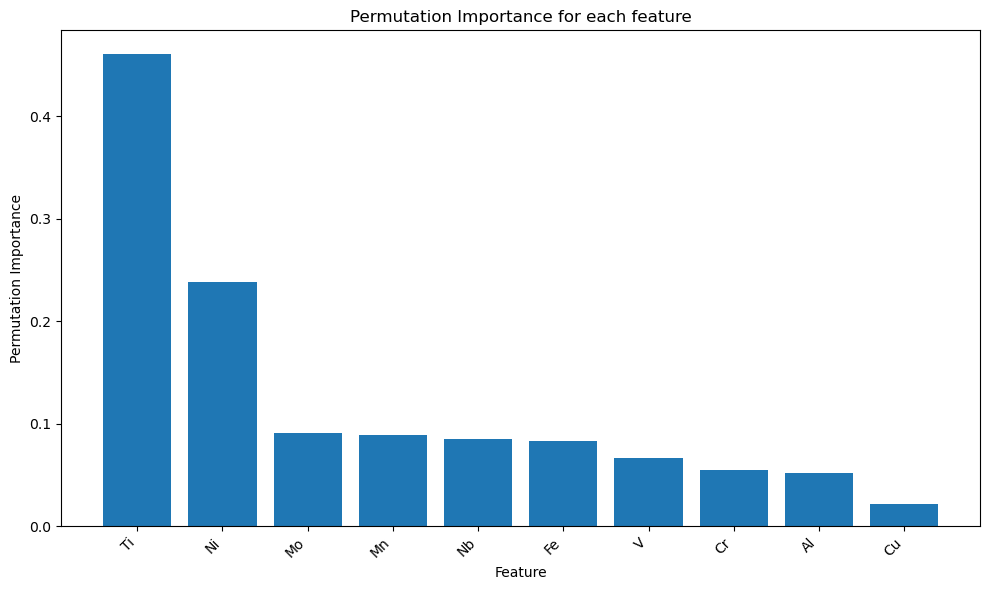

In [43]:
from sklearn.inspection import permutation_importance

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_clf, X_test, y_test, n_repeats=30, random_state=0)

# Get the sorted indices of feature importance
sorted_idx = perm_importance.importances_mean.argsort()[::-1]

# Plot Permutation Importance
plt.figure(figsize=(10, 6))
plt.bar(range(X_test.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.xticks(range(X_test.shape[1]), np.array(featnames)[sorted_idx], rotation=45, ha='right')
plt.xlabel('Feature')
plt.ylabel('Permutation Importance')
plt.title('Permutation Importance for each feature')
plt.tight_layout()
plt.show()


Certainly! Permutation importance is a metric that helps in understanding the impact of each feature on the model's performance. Here's a more detailed explanation of how to interpret permutation importance values:

1. **Definition**: Permutation importance measures the change in model performance (e.g., accuracy, R-squared) when the values of a particular feature are randomly shuffled. It quantifies how much the model relies on each feature to make accurate predictions.

2. **High Importance Value**: If the permutation importance for a feature is high, it means that shuffling that feature significantly impacts the model's performance. A high importance value indicates that the model relies heavily on that feature for making predictions.

3. **Low or Negative Importance Value**: If the permutation importance for a feature is close to zero or negative, shuffling that feature does not notably affect the model's performance. This suggests that the model is not heavily reliant on that feature for predictions.

4. **Relative Importance Comparison**: Comparing the permutation importance values of different features helps in understanding their relative importance to the model. Features with higher importance values are more influential in the model's decision-making process.

5. **Feature Selection**: Permutation importance is useful in feature selection. Features with high importance can be considered more critical and may be prioritized for further analysis. Conversely, features with low importance might be candidates for removal if aiming to simplify the model.

6. **Interpretation Caveat**: It's important to note that permutation importance does not indicate the direction or nature of the relationship between the feature and the target variable (e.g., positive or negative correlation). It only tells us how important the feature is in the context of the model's predictive performance.

In summary, permutation importance provides valuable insights into how each feature contributes to the model's performance. Features with higher permutation importance are more critical for the model's accuracy or predictive power.

Feel free to ask if you have any more questions or need further clarification!

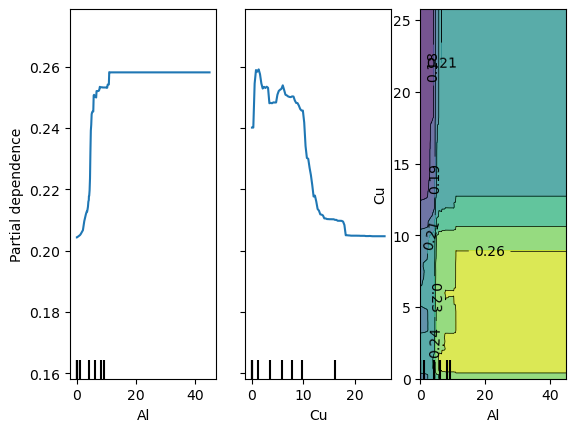

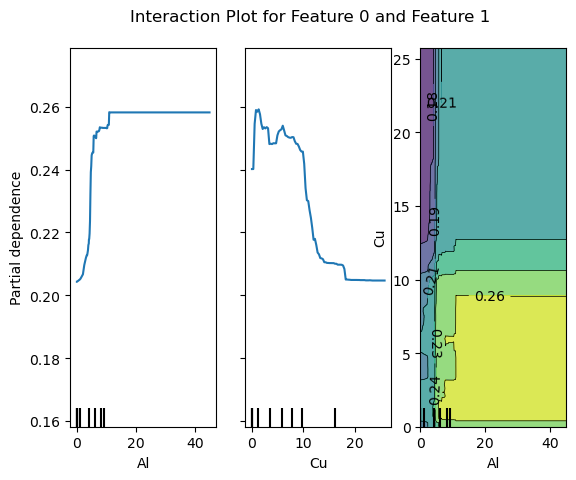

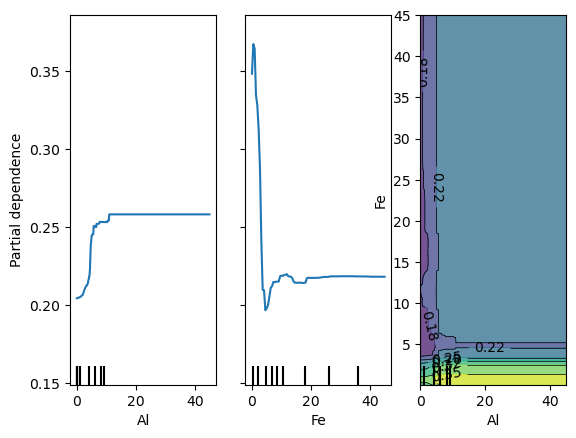

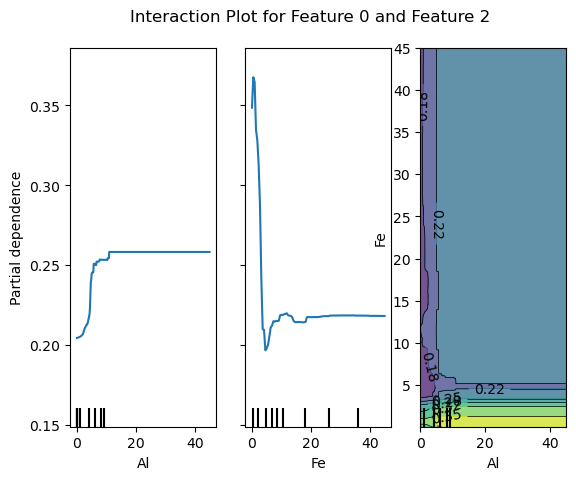

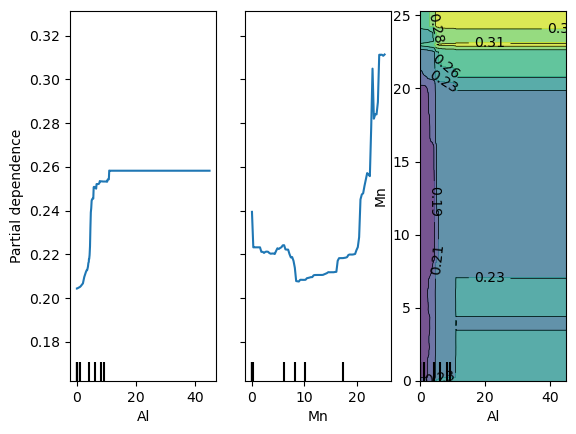

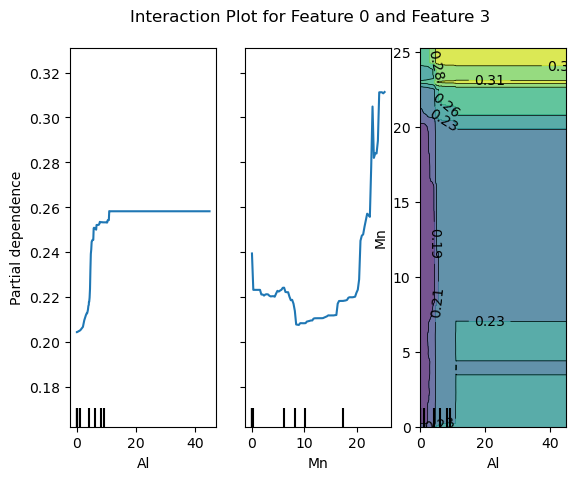

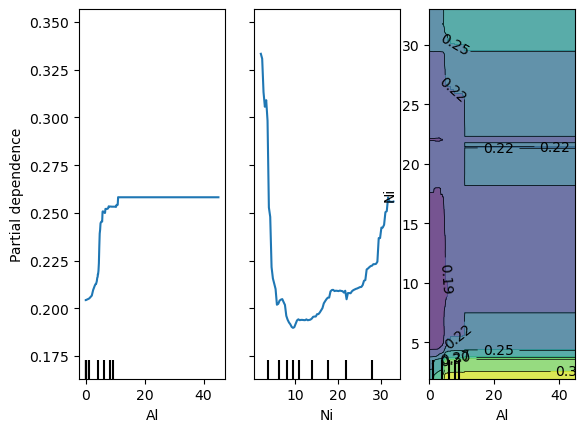

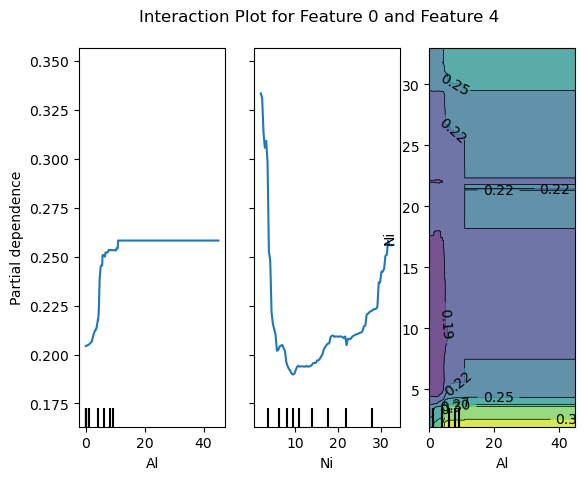

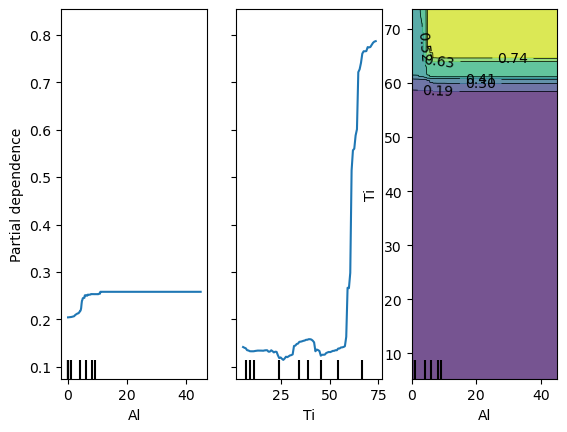

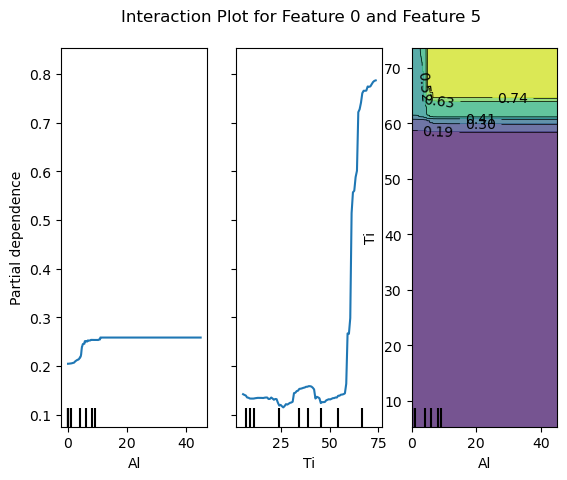

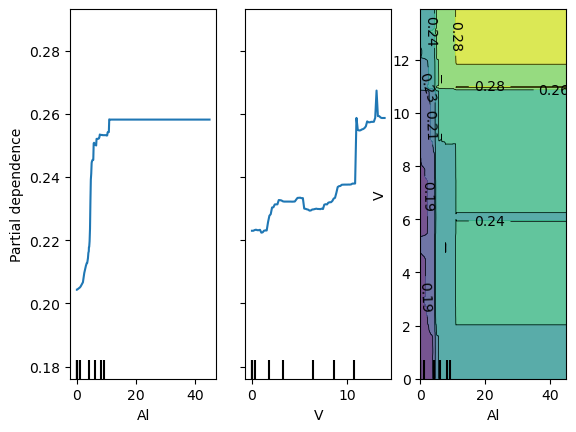

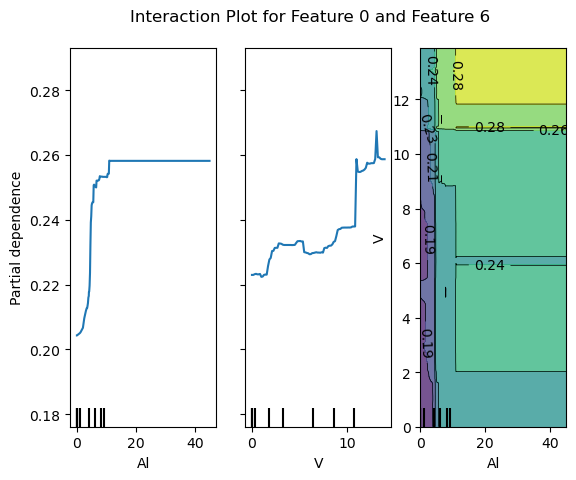

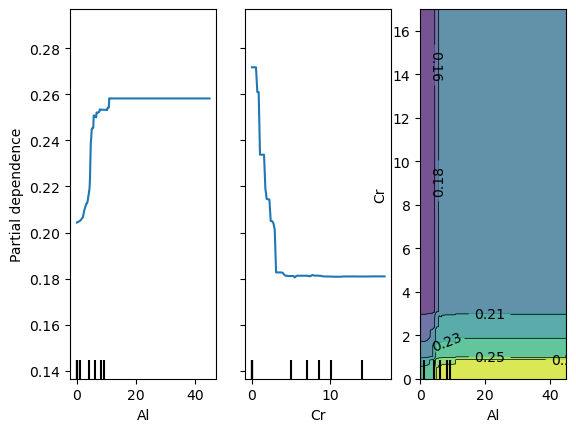

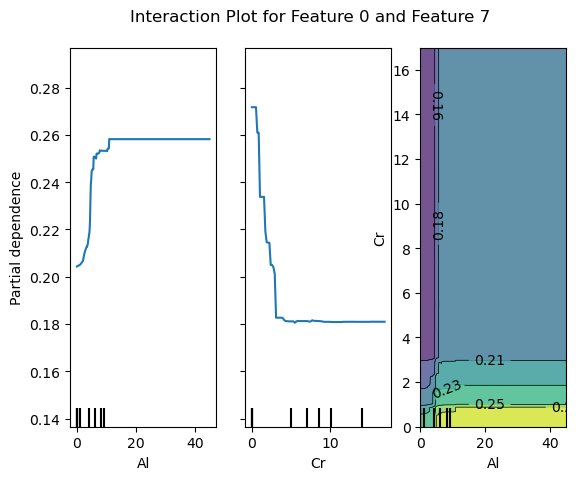

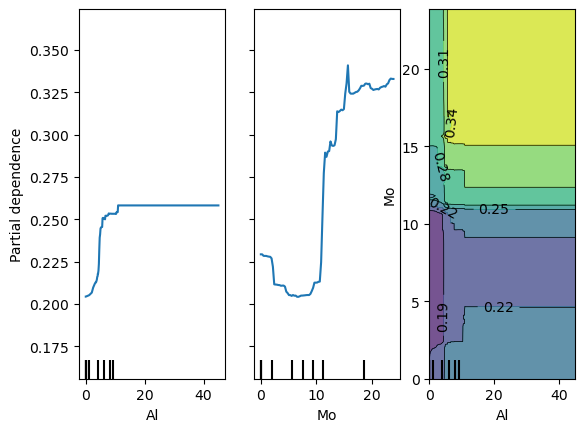

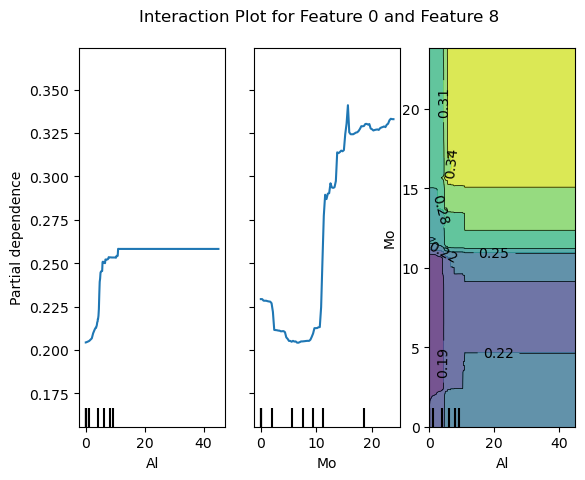

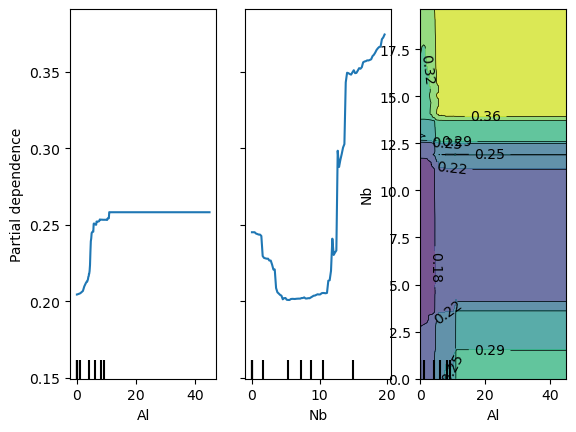

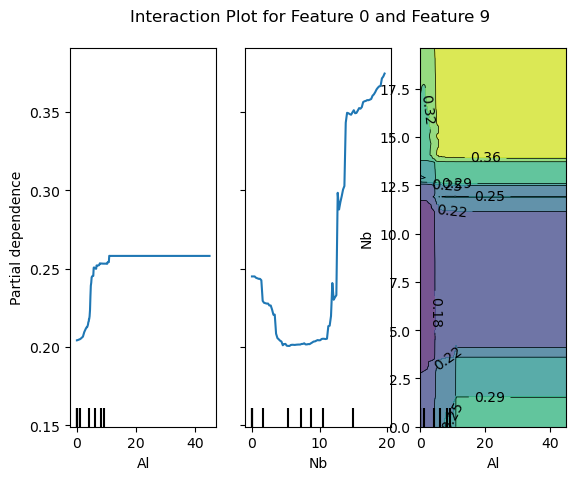

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor

# Assuming rf_clf is your trained RandomForestRegressor
# Assuming X_train is your training data
# Assuming featnames contains your feature names

# Plot interaction plots for the first feature with each of the other features
for i in range(1, X_train.shape[1]):
    features = [0, i, (0,i)]  # 0 is the first feature, i varies from 1 to n_features-1
    display = PartialDependenceDisplay.from_estimator(rf_clf, X_train, features,
                                                      feature_names=featnames)
    display.plot()
    plt.suptitle(f'Interaction Plot for Feature 0 and Feature {i}')
    plt.subplots_adjust(top=0.9)  # Adjust subplot spacing for the title
    plt.show()


In [53]:

# features2 = [3, 2, (3, 2)]
# PartialDependenceDisplay.from_estimator(rf_clf, X_train, features2, target=0)

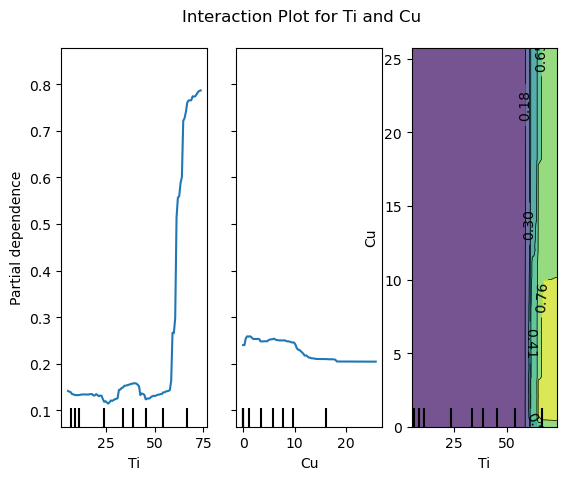

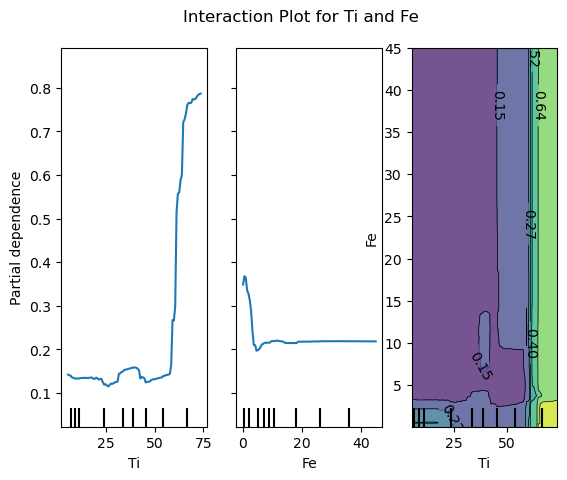

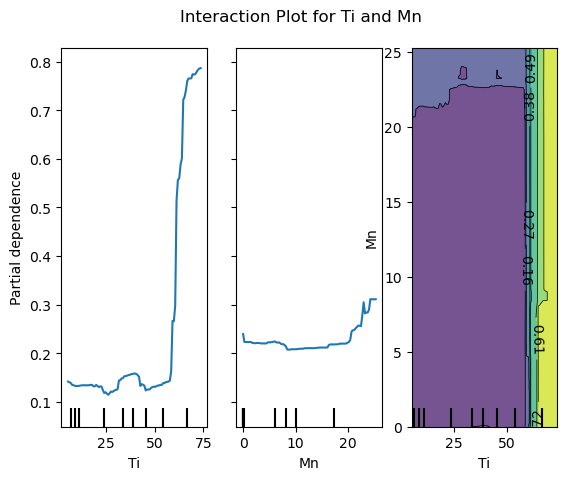

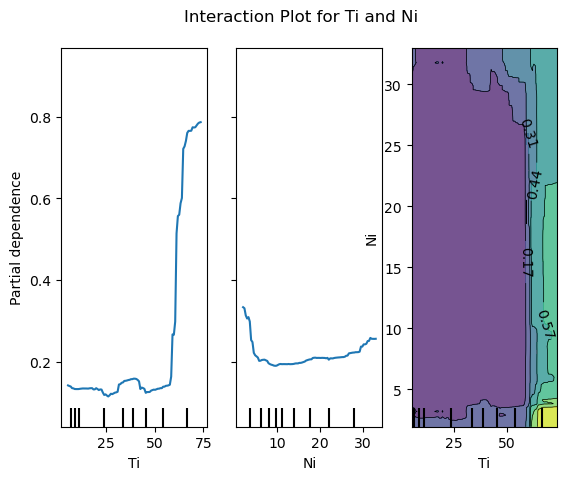

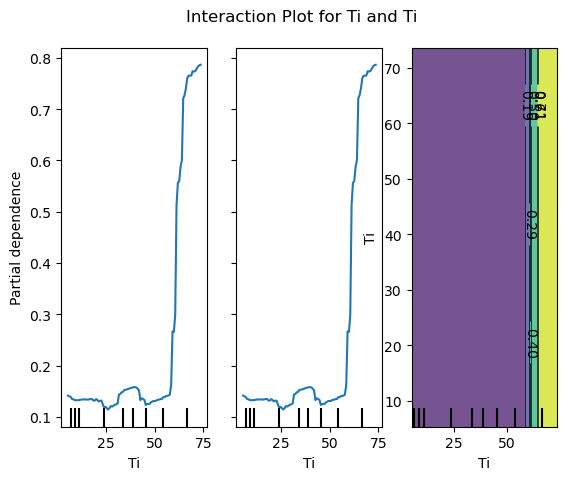

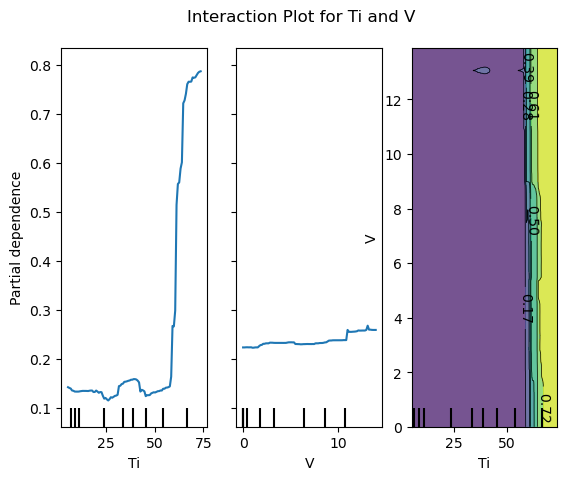

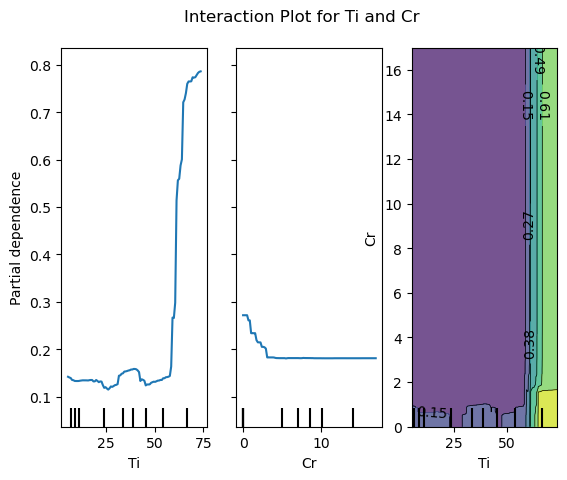

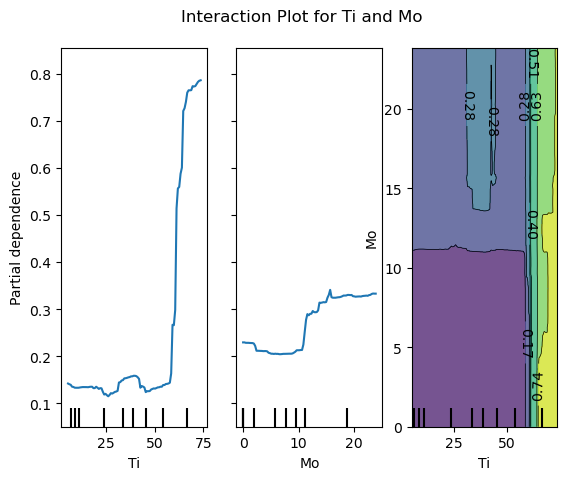

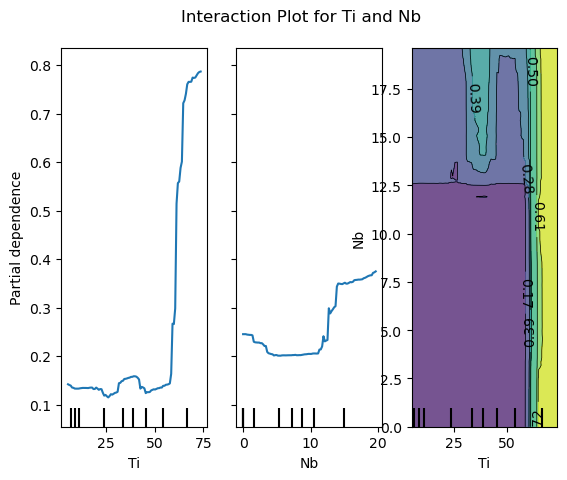

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor

# Assuming rf_clf is your trained RandomForestRegressor
# Assuming X_train is your training data
# Assuming featnames contains your feature names

# Plot interaction plots for the first feature with each of the other features
for i in range(1, X_train.shape[1]):
    features = [5, i, (5,i)]  # 0 is the first feature, i varies from 1 to n_features-1
    display = PartialDependenceDisplay.from_estimator(rf_clf, X_train, features,
                                                      feature_names=featnames)
#     display.plot()
    plt.suptitle(f'Interaction Plot for {featnames[5]} and {featnames[i]}')
    plt.subplots_adjust(top=0.9)  # Adjust subplot spacing for the title
    plt.show()


Certainly! Interaction plots, also known as interaction effects plots, are visualizations that help us understand the interaction between two variables in a predictive model, typically in the context of machine learning. These plots are particularly useful for understanding how the effect of one variable on the target variable changes with the values of another variable.

Here's a detailed explanation of how to interpret interaction plots:

1. **Understanding the Axes:**
   - Interaction plots have two main axes: the x-axis and the y-axis.
   - The x-axis represents the values of one feature (typically the independent variable).
   - The y-axis represents the predicted outcome (usually the dependent variable).

2. **Plotting the Interaction:**
   - Each line or curve in the plot represents the relationship between the feature on the x-axis and the predicted outcome (y-axis) at different levels of the other variable.

3. **Interpreting the Lines or Curves:**
   - Each line or curve corresponds to a specific value or range of values of the other variable (the variable not shown on the plot but affecting the prediction).
   - The slope, shape, or direction of the line or curve reveals how the effect of the x-axis variable changes as the other variable changes.
   - If the line is flat, it suggests no interaction between the two variables.
   - If the lines are parallel, it suggests that the effect of one variable is consistent across different levels of the other variable.

4. **Interaction Effect:**
   - Interaction occurs when the effect of one variable on the outcome varies based on the levels or values of the other variable.
   - A strong interaction implies that the effect of one variable is significantly different at different levels of the other variable.

5. **Practical Example:**
   - Let's say you have a model predicting house prices based on square footage (x-axis) and location (not shown on the plot).
   - The interaction plot will show how the relationship between square footage and house price changes for different locations (lines representing different locations).
   - If the lines are steep for urban areas but flatter for rural areas, it indicates an interaction, suggesting that the effect of square footage on house price varies based on the location.

6. **Use in Interpretation:**
   - Interaction plots are valuable for understanding how variables interact and affect the predicted outcome.
   - They provide insights into the nuanced behavior of the model and can guide decision-making in various domains.

By interpreting interaction plots, you can gain a deeper understanding of how two variables influence the predicted outcome in a machine learning model, allowing for more informed analysis and decision-making.

In [61]:
results_df = pd.DataFrame(X_test, columns=featnames)
results_df['Predicted'] = y_hat
results_df

,Al,Cu,Fe,Mn,Ni,Ti,V,Cr,Mo,Nb,Predicted
298,5.555556,5.555556,5.555556,5.555556,50.000000,5.555556,5.555556,5.555556,5.555556,5.555556,0.625917
65,7.222222,7.222222,7.222222,7.222222,7.222222,35.000000,7.222222,7.222222,7.222222,7.222222,0.000616
551,8.156265,0.000000,1.244321,0.000000,1.657519,77.383626,2.880038,0.000000,4.489708,4.188523,0.982000
483,0.000000,10.000000,0.100000,41.000000,43.900000,5.000000,0.000000,0.000000,0.000000,0.000000,0.999000
23,28.750000,7.916667,7.916667,7.916667,7.916667,7.916667,7.916667,7.916667,7.916667,7.916667,0.002104
...,...,...,...,...,...,...,...,...,...,...,...
148,9.305556,9.305556,9.305556,9.305556,9.305556,9.305556,9.305556,16.250000,9.305556,9.305556,0.000616
493,0.000000,3.020000,0.000000,12.390000,13.970000,22.670000,0.000000,0.000000,28.210000,19.740000,0.827023
1134,0.000000,0.000000,14.973430,0.100525,3.130941,36.251756,0.000000,2.018041,23.441171,20.061146,0.660860
583,0.000000,1.000000,6.310000,4.100000,6.190000,24.800000,0.000000,0.000000,31.500000,26.100000,0.102204


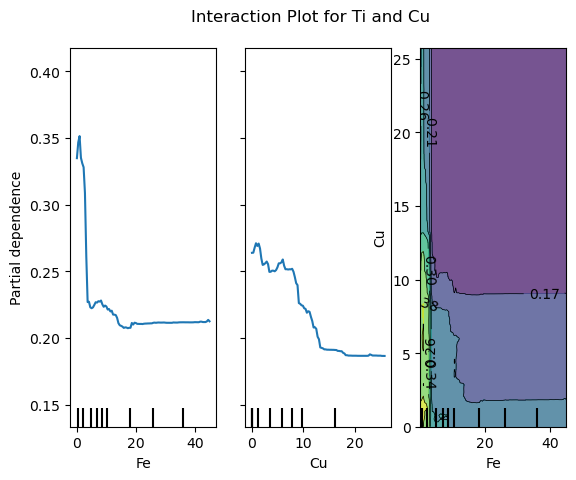

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=42) #random_state=42
rf_clf.fit(X_train,y_train)

# Assuming rf_clf is your trained RandomForestRegressor
# Assuming X_train is your training data
# Assuming featnames contains your feature names

# Plot interaction plots for the first feature with each of the other features
for i in range(1, X_train.shape[1]):
    features = [2, i, (2,i)]  # 0 is the first feature, i varies from 1 to n_features-1
    display = PartialDependenceDisplay.from_estimator(rf_clf, X_train, features,
                                                      feature_names=featnames)
#     display.plot()
    plt.suptitle(f'Interaction Plot for {featnames[5]} and {featnames[i]}')
    plt.subplots_adjust(top=0.9)  # Adjust subplot spacing for the title
    plt.show()
